In [2]:
import pandas as pd
import wikipedia
import numpy as np
import nltk 

In [3]:
from nltk import *

In [4]:
sentence1 = wikipedia.summary("artificial interlligence",sentences =2)
sentence2 = wikipedia.summary("Deep Learning",sentences =2)

In [5]:
sentence1

'Artificial intelligence (AI) is intelligence demonstrated by computers, as opposed to human or animal intelligence. "Intelligence" encompasses the ability to learn and to reason, to generalize, and to infer meaning.'

In [6]:
sentence2

'Deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning. The adjective "deep" in deep learning refers to the use of multiple layers in the network.'

## Sentaneces and Tokens

In [7]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [8]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
s1_words = word_tokenize(sentence1)
s1_sentence = sent_tokenize(sentence1)

In [10]:
print(s1_words,"\n\n number of words ",len(s1_words),"\n\n",s1_sentence)

['Artificial', 'intelligence', '(', 'AI', ')', 'is', 'intelligence', 'demonstrated', 'by', 'computers', ',', 'as', 'opposed', 'to', 'human', 'or', 'animal', 'intelligence', '.', '``', 'Intelligence', "''", 'encompasses', 'the', 'ability', 'to', 'learn', 'and', 'to', 'reason', ',', 'to', 'generalize', ',', 'and', 'to', 'infer', 'meaning', '.'] 

 number of words  39 

 ['Artificial intelligence (AI) is intelligence demonstrated by computers, as opposed to human or animal intelligence.', '"Intelligence" encompasses the ability to learn and to reason, to generalize, and to infer meaning.']


In [11]:
s2_words = word_tokenize(sentence2)
s2_sentence = sent_tokenize(sentence2)

In [12]:
print(s2_words,"\n\n number of words ",len(s2_words),"\n\n",s2_sentence)

['Deep', 'learning', 'is', 'part', 'of', 'a', 'broader', 'family', 'of', 'machine', 'learning', 'methods', ',', 'which', 'is', 'based', 'on', 'artificial', 'neural', 'networks', 'with', 'representation', 'learning', '.', 'The', 'adjective', '``', 'deep', "''", 'in', 'deep', 'learning', 'refers', 'to', 'the', 'use', 'of', 'multiple', 'layers', 'in', 'the', 'network', '.'] 

 number of words  43 

 ['Deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning.', 'The adjective "deep" in deep learning refers to the use of multiple layers in the network.']


In [13]:
set(s2_words).intersection(set(s1_words))

{"''", ',', '.', '``', 'is', 'the', 'to'}

## Frequency Distribution

In [14]:
from nltk.probability import FreqDist

In [15]:
fdist = FreqDist(s1_words)

In [16]:
print(fdist)

<FreqDist with 29 samples and 39 outcomes>


In [17]:
print(fdist.most_common())

[('to', 5), ('intelligence', 3), (',', 3), ('.', 2), ('and', 2), ('Artificial', 1), ('(', 1), ('AI', 1), (')', 1), ('is', 1), ('demonstrated', 1), ('by', 1), ('computers', 1), ('as', 1), ('opposed', 1), ('human', 1), ('or', 1), ('animal', 1), ('``', 1), ('Intelligence', 1), ("''", 1), ('encompasses', 1), ('the', 1), ('ability', 1), ('learn', 1), ('reason', 1), ('generalize', 1), ('infer', 1), ('meaning', 1)]


In [18]:
import matplotlib.pyplot as plt

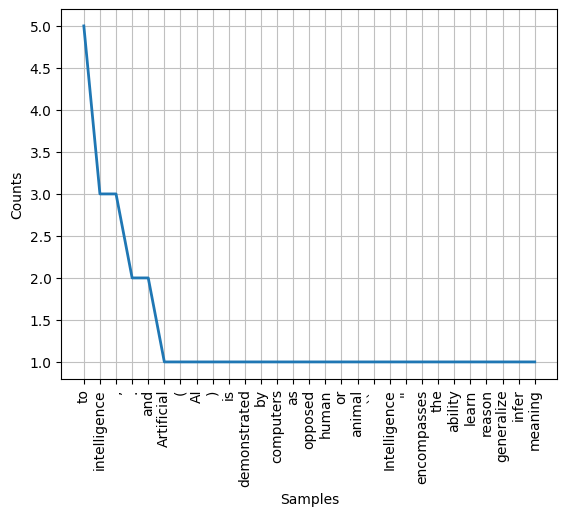

<function matplotlib.pyplot.show(close=None, block=None)>

In [19]:
fdist.plot()
plt.show

## Stopwords

In [20]:
from nltk.corpus import stopwords

In [21]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{"you've", 'been', "mightn't", 'with', "hasn't", "wasn't", 'more', 'is', "you're", 'am', 'any', 'than', 'so', 'them', 'and', 'ourselves', 'being', 'should', 'no', 'whom', 'very', 'o', 'had', 'we', 'both', 'have', 'shan', 'were', 'other', 'by', "haven't", 'of', 'on', 'out', "she's", 'doing', "weren't", 'when', 'below', 'these', 'him', 'same', 'or', 'up', 'such', 'where', 'until', 'who', 'own', 'himself', 'not', 'a', "wouldn't", 'he', 'wasn', "shouldn't", 'won', 'above', 'did', 'wouldn', 'do', 'off', 'to', "mustn't", 'isn', 'its', 'just', "aren't", "doesn't", 'because', 'once', 'haven', 'after', 'this', 'weren', 'there', 'then', 's', 're', 'over', 've', 'ain', 'me', 'against', 'further', 'ours', 'while', 'during', 'they', 'themselves', 'was', 'my', 'before', 'd', 'ma', 'some', 'hers', 'doesn', 'yourselves', 'through', 'those', 'all', "needn't", 'does', "don't", "isn't", 'nor', 'itself', 'from', 'for', 'his', 'can', 'don', 'didn', 'theirs', 'couldn', "didn't", 'll', 'most', 'will', 'betwe

In [22]:
len(stop_words)

179

## Removing Stopwords

In [43]:
filtered_set = []
for word in s2_words:
    if word not in stop_words:
        filtered_set.append(word)
print("Tokenize Sentence ",len(s2_words))
print("Filterd Sentence ",len(filtered_set))

Tokenize Sentence  43
Filterd Sentence  29


## Lexicon Normalization

In [24]:
lem = WordNetLemmatizer()

In [26]:
stem = WordNetLemmatizer()

In [29]:
word = "went"
print("Lemmatized Word : ",lem.lemmatize(word,"v"))

Lemmatized Word :  go


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [sentence1]

#create TfidVectorizer object
tfidf = TfidfVectorizer()

#compute a sparse matrix of word vectors for the corpus
tfidf_matrix = tfidf.fit_transform(corpus)

#display property of sparse matrix 
tfidf_matrix

# convert this sparse matrix to a dense numpy array , so that we can create a data frame for display purposes only
df = pd.DataFrame(tfidf_matrix.toarray(),columns = tfidf.get_feature_names_out())
print(df)



   ability     ai   and  animal  artificial     as     by  computers  \
0    0.125  0.125  0.25   0.125       0.125  0.125  0.125      0.125   

   demonstrated  encompasses  ...  infer  intelligence     is  learn  meaning  \
0         0.125        0.125  ...  0.125           0.5  0.125  0.125    0.125   

   opposed     or  reason    the     to  
0    0.125  0.125   0.125  0.125  0.625  

[1 rows x 22 columns]


In [34]:
#compute TF-IDF matrix for a new document
new_doc = "ai is a far more dangoues"
new_doc_vector = tfidf.transform([new_doc])
df_new_doc = pd.DataFrame(new_doc_vector.toarray(),columns = tfidf.get_feature_names_out())
print(df_new_doc)

   ability        ai  and  animal  artificial   as   by  computers  \
0      0.0  0.707107  0.0     0.0         0.0  0.0  0.0        0.0   

   demonstrated  encompasses  ...  infer  intelligence        is  learn  \
0           0.0          0.0  ...    0.0           0.0  0.707107    0.0   

   meaning  opposed   or  reason  the   to  
0      0.0      0.0  0.0     0.0  0.0  0.0  

[1 rows x 22 columns]


In [35]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
print(cosine_sim)

[[1.]]


In [42]:
#to see similerities 
corpus = s1_sentence

#create TfidfVectorizer
tfidf = TfidfVectorizer()

#compute a sparse matrix of word vectors for the corpus 
tfidf_matrix = tfidf.fit_transform(corpus)

#compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
print(cosine_sim)

[[1.         0.19478421]
 [0.19478421 1.        ]]
